In [75]:
import numpy as np 
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import warnings
os.chdir('/home/akhilbvs/Kaggle/Sentiment Analysis on Movie Reviews')
warnings.filterwarnings('ignore')

In [9]:
train_data=pd.read_csv('train.tsv',delimiter='\t',quoting=3)
test_data=pd.read_csv('test.tsv',delimiter='\t',quoting=3)
submission=pd.read_csv('sampleSubmission.csv')

In [6]:
train_data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


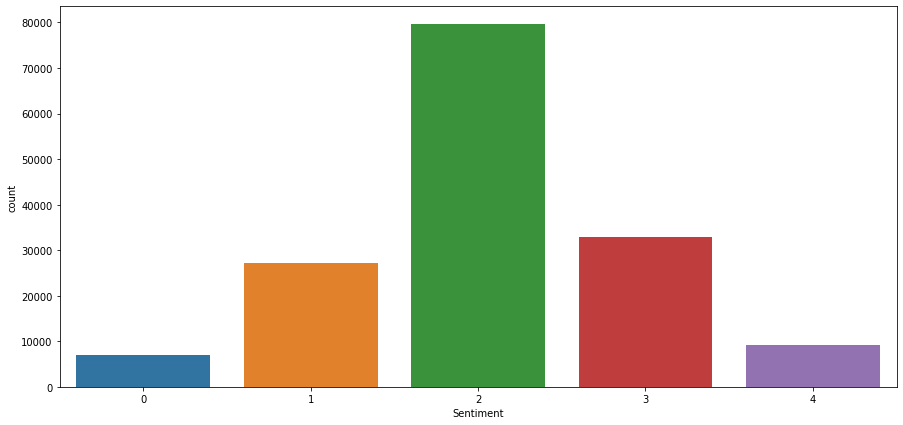

In [8]:
plt.figure(figsize=(15,7))
sns.countplot(train_data['Sentiment'])
plt.show()

In [12]:
ps=PorterStemmer()

In [99]:
def analyze(review):
    sentence=re.sub('[^a-z]', ' ', review.lower()).split()
    return [ps.stem(word) for word in sentence if word not in set(stopwords.words('english'))]

In [51]:
pipeline_1=Pipeline([
    ('bow', CountVectorizer(analyzer=analyze)),
    ('tfidf', TfidfTransformer()),
    ('Classifier', MultinomialNB())])

In [52]:
x=train_data['Phrase']
y=train_data['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [53]:
pipeline_1.fit(x_train, y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function analyze at 0x7f957a41b2f0>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
 ...f=False, use_idf=True)), ('Classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [54]:
y_pred_MNb=pipeline_1.predict(x_test)

In [55]:
cm_MNB=confusion_matrix(y_true=y_test,y_pred=y_pred_MNb)
accuracy_MNb=accuracy_score(y_true=y_test,y_pred=y_pred_MNb)*100

In [56]:
print('Accuracy of Multinomial Naive Bayes: {}%'.format(accuracy_MNb))

Accuracy of Multinomial Naive Bayes: 58.62488786364219%


In [57]:
pipeline_2=Pipeline([
    ('bow', CountVectorizer(analyzer=analyze)),
    ('tfidf', TfidfTransformer()),
    ('Classifier', DecisionTreeClassifier())])

In [58]:
pipeline_2.fit(x_train, y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function analyze at 0x7f957a41b2f0>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
 ...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])

In [59]:
y_pred_Tree=pipeline_2.predict(x_test)

In [60]:
cm_Tree=confusion_matrix(y_true=y_test,y_pred=y_pred_Tree)
accuracy_Tree=accuracy_score(y_true=y_test,y_pred=y_pred_Tree)*100

In [61]:
print('Accuracy of Decision Tree Classifier: {}%'.format(accuracy_Tree))

Accuracy of Decision Tree Classifier: 62.48558246828143%


In [63]:
pipeline_3=Pipeline([
    ('bow', CountVectorizer(analyzer=analyze)),
    ('tfidf', TfidfTransformer()),
    ('Classifier', RandomForestClassifier())])

In [65]:
pipeline_3.fit(x_train, y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function analyze at 0x7f957a41b2f0>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
 ...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [66]:
y_pred_forest=pipeline_3.predict(x_test)

In [67]:
cm_Forest=confusion_matrix(y_true=y_test,y_pred=y_pred_forest)
accuracy_Forest=accuracy_score(y_true=y_test,y_pred=y_pred_forest)*100

In [68]:
print('Accuracy of Random Forest Classifier: {}%'.format(accuracy_Forest))

Accuracy of Random Forest Classifier: 63.876073305139045%


In [100]:
pipeline_4=Pipeline([
    ('bow', CountVectorizer(analyzer=analyze)),
    ('tfidf', TfidfTransformer()),
    ('Classifier', LogisticRegression())])

In [71]:
pipeline_4.fit(x_train, y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function analyze at 0x7f957a41b2f0>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
 ...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [72]:
y_pred_LR=pipeline_4.predict(x_test)

In [73]:
cm_LR=confusion_matrix(y_true=y_test,y_pred=y_pred_LR)
accuracy_LR=accuracy_score(y_true=y_test,y_pred=y_pred_LR)*100

In [80]:
print('Accuracy of Logistic Regressor: {}%'.format(accuracy_LR))

Accuracy of Logistic Regressor: 62.06907599641164%


In [81]:
classifiers=['MultinomialNB','Decision Tree','Random Forest','Logistic Regressor']

In [82]:
accuracy_scores=[accuracy_MNb,accuracy_Tree,accuracy_Forest,accuracy_LR]

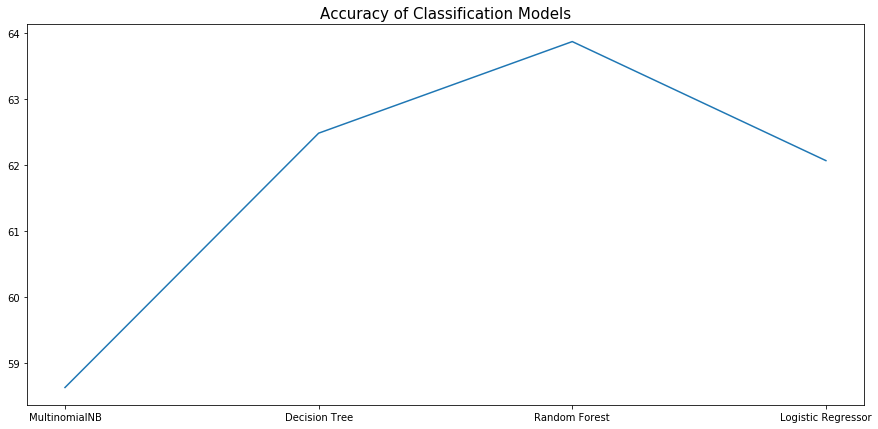

In [88]:
plt.figure(figsize=(15,7))
plt.plot(classifiers,accuracy_scores)
plt.title('Accuracy of Classification Models',size=15)
plt.show()

In [95]:
X_test=test_data['Phrase']

In [107]:
Y_pred=pipeline_3.predict(X_test)

In [113]:
submission.Sentiment=Y_pred
submission.to_csv('Submission.csv',index=False)